In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import scipy
from scipy.stats import norm
from scipy.signal import argrelextrema
import os, glob

In [3]:
path = 'ATT_thick2_1_L1_snsl.csv'
data = pd.read_csv(path)

In [4]:
#no filter
def att_histogram(data):
    ch1 = np.array(data['Maximum(1) (V)'])
    ch2 = np.array(data['Maximum(4) (V)'])
    time = np.array(data['Time (s)'])
    
    plt.rcParams["figure.figsize"] = (6.5,4)

    # histogram
    #plt.title("Leading edge timing method")
    #plt.xlabel("Delay (s)")
    #plt.ylabel("Frequency")
    #plt.axvline(time_delays.mean(),color='k', linestyle='dashed', linewidth=1)
    
    plt.scatter(ch1,ch2, marker='+')
    plt.ylim(min(ch2) *1, max(ch2))
    plt.xlim(min(ch1) * 1, max(ch1) * 1.1)
    plt.ylabel("Channel 2")
    plt.xlabel("Channel 1")
    
    """
    plt.title("Channel 1")
    plt.xlabel("Attenuation (V)")
    plt.ylabel("Frequency")
    
    plt.hist(ch1, density=True, alpha=0.6, color='gray', bins=23)
    plt.show()
        
    plt.title("Channel 2")
    plt.xlabel("Attenuation (V)")
    plt.ylabel("Frequency")
    plt.hist(ch2, density=True, alpha=0.6, color='purple', bins=23)
    plt.show()
        
    plt.title("Channel 1 v. Channel 2")
    plt.xlabel("Attenuation (V)")
    plt.ylabel("Frequency")
    plt.hist(ch1, density=True, alpha=0.6, color='gray', bins=23)
    plt.hist(ch2, density=True, alpha=0.6, color='purple', bins=23)
    plt.show()
    """
    

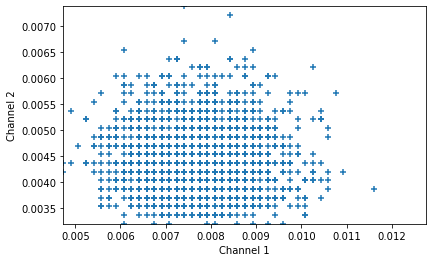

In [5]:
att_histogram(data)

In [6]:

def overlay_tr(folder):
    num_traces = len([entry for entry in os.listdir(folder) if os.path.isfile(os.path.join(folder, entry))])
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    num_data_pts = len(pd.read_csv(csv_files[1], skiprows=1)['1 (VOLT)'])
    avg_ch1 = np.zeros(num_data_pts)
    for f in csv_files:
        # read the csv file
        data = pd.read_csv(f, skiprows=1)
        ch1 = np.array(data['1 (VOLT)'])
        ch2 = np.array(data['4 (VOLT)'])
        time = np.array(data['Time (s)'])
        

        if(all(i < 0.003 for i in ch1) or all(i < 0.003 for i in ch2)):
            continue
        plt.plot(time,ch1, color='green')
        #plt.plot(time,ch2, color='purple')
        avg_ch1 = avg_ch1 + ch1
    
    plt.plot(time, avg_ch1 / num_traces, color='pink')        
    plt.show()
    
    return avg_ch1 / num_traces


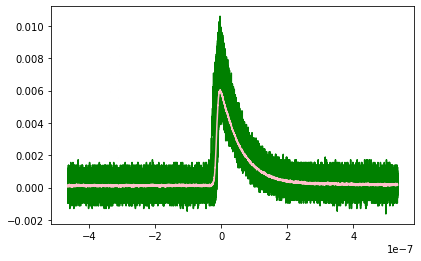

array([1.46765692e-04, 1.36723851e-04, 2.96108772e-05, ...,
       2.48857746e-04, 1.75217576e-04, 1.50112973e-04])

In [7]:
folder = 'ATT_thick2_1_L1_tr'
overlay_tr(folder)

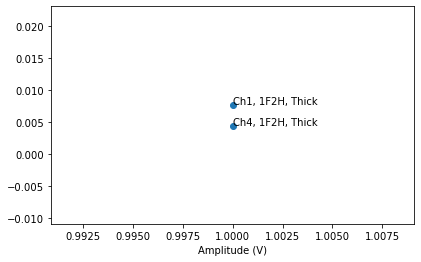

In [8]:
fig, ax = plt.subplots()

path = 'ATT_thick2_1_L1_snsl.csv'
data = pd.read_csv(path)
ch1 = np.array(data['Maximum(1) (V)'])
ch4 = np.array(data['Maximum(4) (V)'])

colors = ['purple', 'orange']

num_pts = len(ch1)

points = [sum(ch1) / num_pts, sum(ch4) / num_pts]
num_fibs = [1,1]

labels = ['Ch1, 1F2H, Thick', 'Ch4, 1F2H, Thick']

for i, txt in enumerate(labels):
    ax.annotate(txt, (num_fibs[i], points[i]))


ax.scatter(num_fibs, points)

plt.xlabel('No. Fibers')
plt.xlabel('Amplitude (V)')

plt.show()

In [9]:
sum(ch1)

13.903441099999906

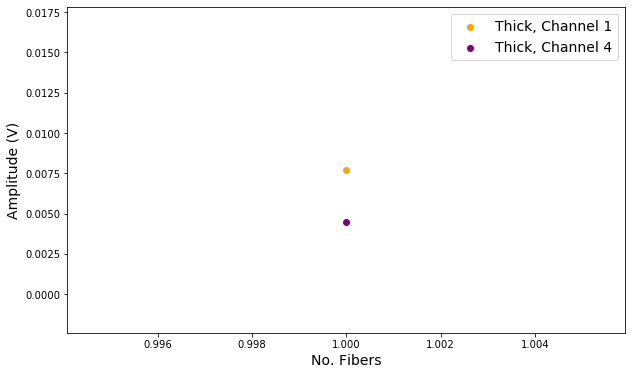

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

path = 'ATT_thick2_1_L1_snsl.csv'
data = pd.read_csv(path)
ch1 = np.array(data['Maximum(1) (V)'])
ch4 = np.array(data['Maximum(4) (V)'])
num_pts = len(ch1)

colors = ['purple', 'orange']

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (V)',fontsize=14)


ch1_thick_1f1h = plt.scatter(1, sum(ch1) / num_pts, color='orange')
ch4_thick_1f1h = plt.scatter(1, sum(ch4) / num_pts, color='purple')
           
plt.legend((ch1_thick_1f1h, ch4_thick_1f1h), ("Thick, Channel 1", "Thick, Channel 4"), fontsize=14)
plt.show()

In [14]:
def get_amplitudes(folder):
    num_traces = len([entry for entry in os.listdir(folder) if os.path.isfile(os.path.join(folder, entry))])
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    avg_maxes_ch1 = []
    counter = 0
    for f in csv_files:
        
        print(counter, f)
        data = pd.read_csv(f)
        ch1 = np.array(data['Maximum(1) (V)'])
        

        # delete the largest arguments from both datasets (to take care of messy data and outliers)
        argument1 = np.where(ch1 > np.quantile(ch1, 0.95))
        argument2 = np.where(ch1 < np.quantile(ch1,0.05))

    
        # create array of indecies of the data points we want to delete
        del_args = np.append(argument1, argument2)
    
        ch1 = np.delete(ch1, del_args)
        
        num_pts = len(ch1)
        
        avg_maxes_ch1.append(sum(ch1) / num_pts * 10 ** 3)
        counter = counter + 1
        
    
    return avg_maxes_ch1

In [15]:
amps = get_amplitudes("scient atten")
amps

0 scient atten/ATT_THIC_1fibre1hole.csv
1 scient atten/ATT_THIC_2fibre2hole.csv
2 scient atten/ATT_THIC_1fibre2hole_lft.csv
3 scient atten/ATT_THIN_1fibre2hole_lft 1.csv
4 scient atten/ATT_THIC_2fibre1hole 0.csv
5 scient atten/ATT_THIN_2fibre2hole 0.csv
6 scient atten/ATT_THIC_1fibre2hole_rgh.csv


[10.692259786476887,
 12.580434782608656,
 5.523049956178811,
 5.576689774696722,
 13.881900452488644,
 13.512454212454198,
 5.745557491289228]

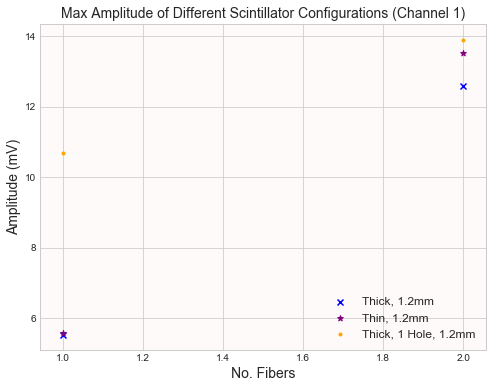

In [27]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('snow')

plt.xlabel('No. Fibers', fontsize=14)
plt.ylabel('Amplitude (mV)',fontsize=14)

#plt.xticks([1,2,3,4,5])

# thick, 2 holes
d1 = plt.scatter([1,2], [amps[2], amps[1]], color='blue', marker='x')
# thin, 2 holes
d2 = plt.scatter([1,2], [amps[3], amps[5]], color='purple', marker='*')
# thick, 1 hole
d3 = plt.scatter([1,2], [amps[0], amps[4]], color='orange', marker='.')

#plt.ylim(min(amps) * 0.8, max(amps) * 1.1)
plt.title("Max Amplitude of Different Scintillator Configurations (Channel 1)", fontsize=14)
           
#plt.legend((d1, d2, d3), ("Thin, 1.2mm", "Thick, Single 1.2mm", "Thick, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.legend((d1, d2, d3), ("Thick, 1.2mm", "Thin, 1.2mm", "Thick, 1 Hole, 1.2mm"), fontsize=12, frameon=False, loc='lower right')
plt.show()

In [24]:
amps[1] / amps[2]

2.277805720104799

In [25]:
amps[5]/amps[3]

2.4230241878909338

In [26]:
amps[4]/amps[0]

1.2983130535273635